# Importing Necessary Libraries

In [99]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn import tree, linear_model, ensemble, neighbors
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing

In [100]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Luckiely we have only one Categorical Variabale

## Checking for null values

In [102]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Only total_bedrooms column has null values - 207

In [103]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Total Bedrooms Distribution

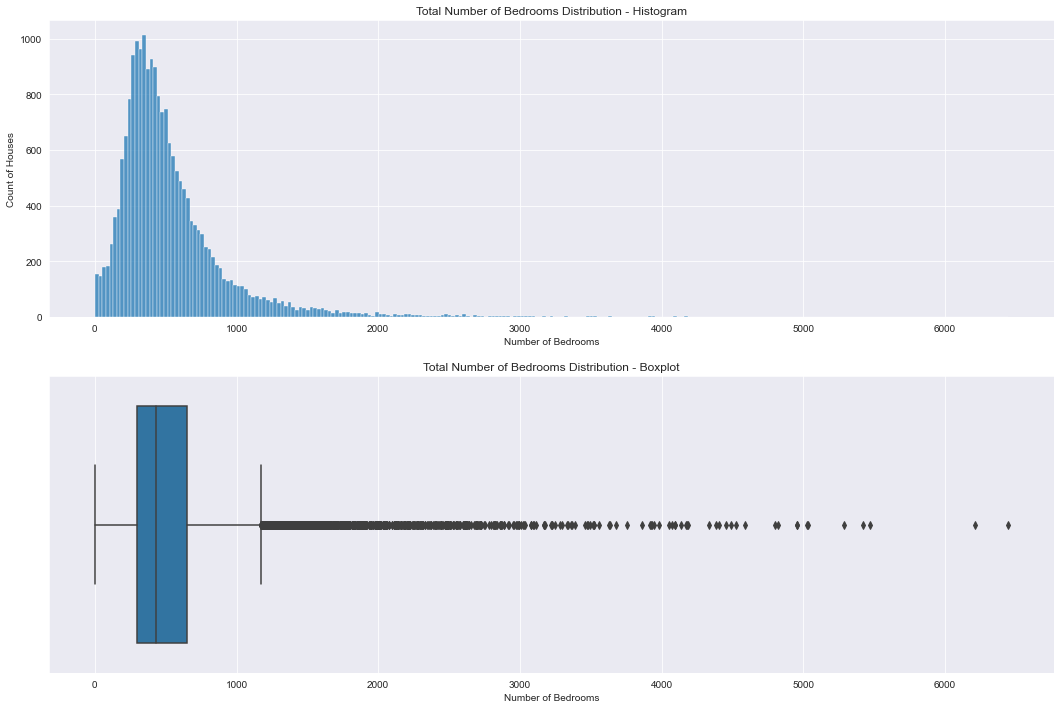

In [104]:
fig, axes = plt.subplots(figsize=(18, 12), nrows=2, ncols=1)

sns.histplot(data.total_bedrooms, ax=axes[0])
axes[0].set_title("Total Number of Bedrooms Distribution - Histogram")
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Count of Houses')

sns.boxplot(data.total_bedrooms, ax=axes[1])
axes[1].set_title("Total Number of Bedrooms Distribution - Boxplot")
axes[1].set_xlabel('Number of Bedrooms')


plt.show()

#### From Above Distribution we observe that the total_bedrooms data has a lot and I mean a lot of Outliers. So it would be better to fill the null values by the median.

### Filling Null Values

In [105]:
data.total_bedrooms.fillna(data.total_bedrooms.median(), inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Analysis and EDA

## Distribution Plot for all Numerical Features

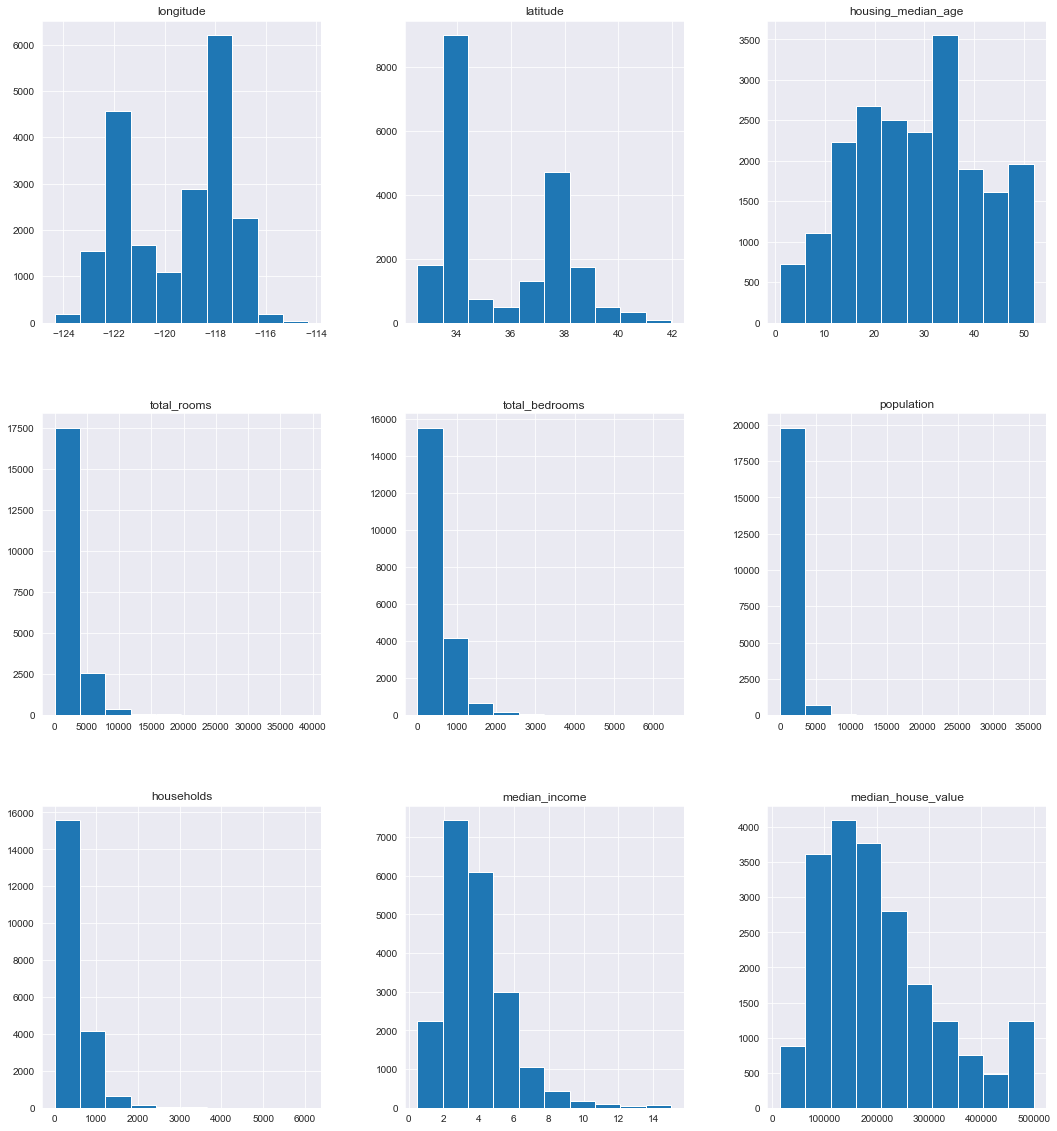

In [106]:
plt.rcParams["figure.figsize"] = (18, 20)
data.hist()
plt.show()

#### We can say from above plots most of the features have a right skewness in their data

## Heat map to find Corelation between Features

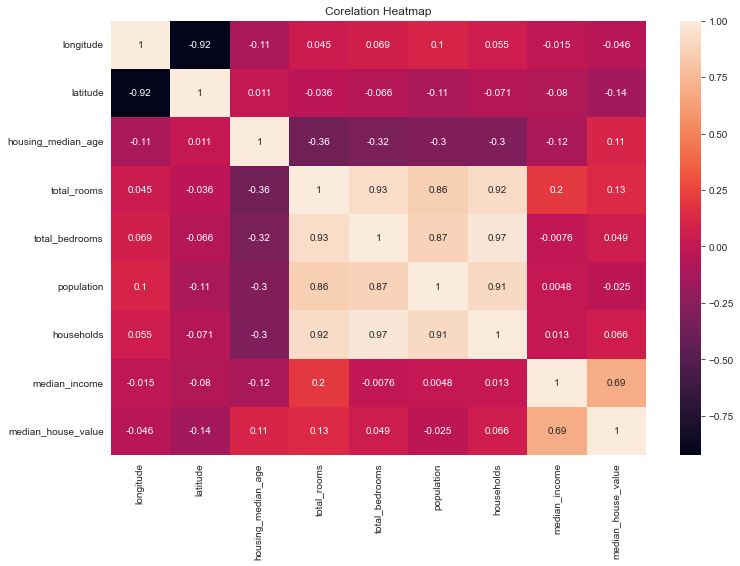

In [107]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

#### We can observe some strong positive relations between total_rooms, total_bedrooms, population and households
#### Also there is strong negative relation between latitude and longitude

In [108]:
def scatter_plots(x_var, y_var):
    fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=3)
    
    ax = 0
    for y in y_var:
        sns.scatterplot(x=x_var, y=y, hue="ocean_proximity", data=data, ax=axes[ax])
        axes[ax].set_title(f"{x_var} vs {y}")

        ax += 1

    plt.show()

## Total Rooms vs Other Corelated Variables

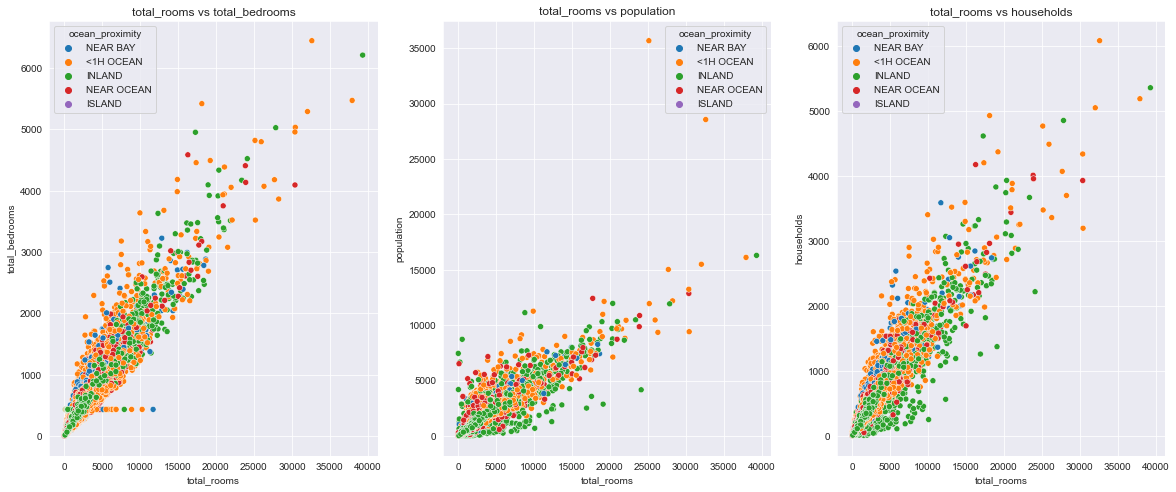

In [109]:
scatter_plots("total_rooms", ["total_bedrooms", "population", "households"])

#### We Can observe a Positive Linearn Relation above

## Housing Median Age vs Other Corelated Features

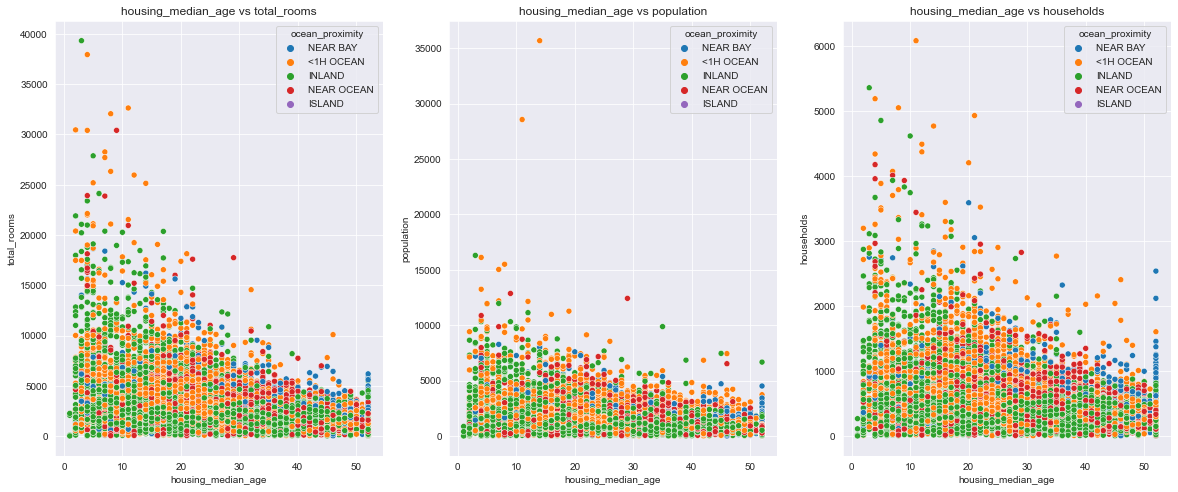

In [110]:
scatter_plots("housing_median_age", ["total_rooms", "population", "households"])

#### As Population went up with Time the Number of Rooms in houses and the Householding also went up.

## Median Income vs Median House Values

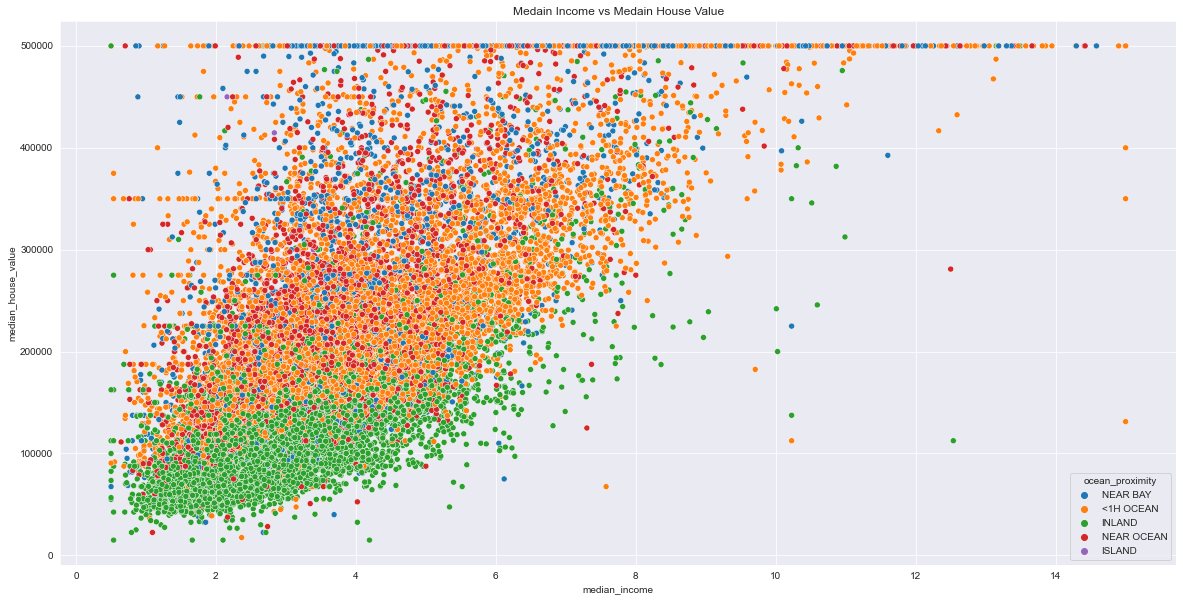

In [111]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.scatterplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=data)
plt.title("Medain Income vs Medain House Value")
plt.show()

# Preparing Data

## Encoding Categorican Variable

In [112]:
new_data = pd.get_dummies(data)
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [113]:
X = new_data.drop("median_house_value", axis=1)
y = new_data.median_house_value.values.reshape(-1, 1)

## Feature Scaling

In [114]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

## Splitting Data into Training and Testing Set

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Regression Model

In [116]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for regressor in MLA:
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        regressor_r2_score = r2_score(y_test, y_pred)
        regressor_mse = mean_squared_error(y_test, y_pred)

        MLA_name = regressor.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'R^2 Score'] = regressor_r2_score*100

        print(MLA_name, "Done")
        row_index+=1

## Training and Testing Multiple Models

In [117]:
MLA = [
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    linear_model.LinearRegression(),
    linear_model.SGDRegressor(),
    
    ensemble.RandomForestRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    
    neighbors.KNeighborsRegressor(),
    
    XGBRegressor(),
    CatBoostRegressor(silent=True)
]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

DecisionTreeRegressor Done
ExtraTreeRegressor Done
LinearRegression Done
SGDRegressor Done
RandomForestRegressor Done
AdaBoostRegressor Done
ExtraTreesRegressor Done
GradientBoostingRegressor Done
KNeighborsRegressor Done
XGBRegressor Done
CatBoostRegressor Done


## Getting top 5 Best Performing Models

In [118]:
MLA_compare = MLA_compare.sort_values(by="R^2 Score", ascending=False).reset_index(drop=True)[:5]
MLA_compare

,MLA Name,R^2 Score
0,CatBoostRegressor,84.969507
1,XGBRegressor,83.392155
2,RandomForestRegressor,82.474024
3,ExtraTreesRegressor,79.842483
4,GradientBoostingRegressor,77.005710


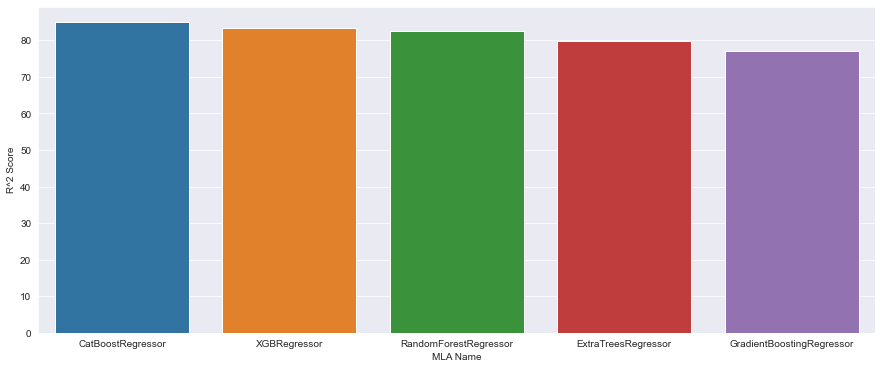

In [119]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="MLA Name", y="R^2 Score",data=MLA_compare)
plt.show("Comparing R^2 scores of Models")
plt.show()

# Using Catboost Regressor

In [120]:
regressor = CatBoostRegressor(silent=True)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [121]:
regressor_r2_score = r2_score(y_test, y_pred)
regressor_mse = mean_squared_error(y_test, y_pred)

print("CatBoostRegressor r^2 Score :", regressor_r2_score)

CatBoostRegressor r^2 Score : 0.8496950665220809
